In [1]:
#import knižníc

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
# Načítanie vstupných dát
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# import 303 premených (vstup = vek,pohlavie(),  a y = stav 1 pre mal infarkt 0 pre neaml infarkt)

vstup = df.iloc[0:302,[0,1,4,7]].values
#maticax_trenovacia = df.iloc[0:302,[0,1,4,7]].values
#maticax_testovacie = df.iloc[0:302,[0,1,4,7]].values
y = df.iloc[0:302,[13]].values
#maticay_trenovacia = np.where((df.iloc[0:302,13]) == 1 ,-1,1)
#maticay_testovacie = np.where((df.iloc[0:302,13]) == 1 ,-1,1)

maticax_trenovacia, maticax_testovacie, maticay_trenovacia, maticay_testovacie = train_test_split(vstup, y, test_size=0.30)


In [4]:
# prenesenie dát do nového datafamu pre vytvorenie párového grafu
df1 = pd.DataFrame()
df1['age'] = df['age']
df1['sex'] = df['sex']
df1['trtbps'] = df['trtbps']
df1['thalachh'] = df['thalachh']
df1['output'] = df['output']
df1

,age,sex,trtbps,thalachh,output
0,63,1,145,150,1
1,37,1,130,187,1
2,41,0,130,172,1
3,56,1,120,178,1
4,57,0,120,163,1
...,...,...,...,...,...
298,57,0,140,123,0
299,45,1,110,132,0
300,68,1,144,141,0
301,57,1,130,115,0


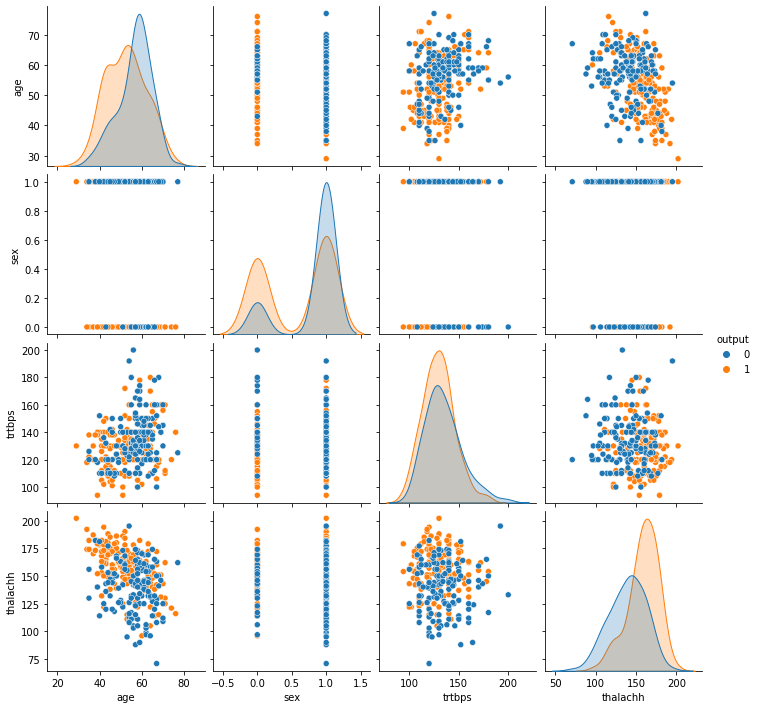

In [5]:
#vypis vzťahov medzi vekom, pohlavým, tepom v kludnom stave a maximálnim tepom
sns.pairplot(data=df1, hue='output')

In [6]:
keras_model = Sequential()
#akt funkcie tanh, relu, sigmoid
#variacia 1 presnost 41.70%
# keras_model.add(Dense(10, input_dim=4, activation='sigmoid'))
# keras_model.add(Dense(5, activation='sigmoid'))
# keras_model.add(Dense(1, activation='relu'))
#variacia 2 44.07%
# keras_model.add(Dense(10, input_dim=4, activation='sigmoid'))
# keras_model.add(Dense(5, activation='relu'))
# keras_model.add(Dense(1, activation='relu'))
#variacia 3 46.92%
# keras_model.add(Dense(30,input_dim=4,activation='sigmoid'))
# keras_model.add(Dense(30,activation='sigmoid'))
# keras_model.add(Dense(3))
#variacia 4 0.0%
# keras_model.add(Dense(30, input_dim=4, activation='relu'))
# keras_model.add(Dense(30, activation='relu'))
# keras_model.add(Dense(3))
#variacia 5 52.13%
# keras_model.add(Dense(10, input_dim=4, activation='relu'))
# keras_model.add(Dense(5, activation='relu'))
# keras_model.add(Dense(1))
#variacia 6 54.50%
# keras_model.add(Dense(10, input_dim=4, activation='relu'))
# keras_model.add(Dense(5, activation='relu'))
# keras_model.add(Dense(1, activation='relu'))
#variacia 7 57.34%
# keras_model.add(Dense(10, input_dim=4, activation='sigmoid'))
# keras_model.add(Dense(5, activation='sigmoid'))
# keras_model.add(Dense(1, activation='sigmoid'))
#variacia 8 68.25%
# keras_model.add(Dense(10, input_dim=4, activation='relu'))
# keras_model.add(Dense(5, activation='relu'))
# keras_model.add(Dense(1, activation='sigmoid'))
############################################################
keras_model.add(Dense(10, input_dim=4, activation='relu'))
keras_model.add(Dense(5, activation='relu'))
keras_model.add(Dense(1, activation='sigmoid'))

In [7]:
# loss, optimizer
# keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# keras_model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])
# keras_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
# keras_model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = keras_model.fit(maticax_trenovacia, maticay_trenovacia, validation_data=(maticax_trenovacia, maticay_trenovacia), epochs=10, batch_size=100)
scores=keras_model.evaluate(maticax_trenovacia,maticay_trenovacia)

Epoch 1/10
3/3 [==============================] - 2s 564ms/step - loss: 2.2529 - accuracy: 0.4877 - val_loss: 1.8193 - val_accuracy: 0.5308
Epoch 2/10
3/3 [==============================] - 0s 20ms/step - loss: 1.6601 - accuracy: 0.5539 - val_loss: 1.3447 - val_accuracy: 0.5213
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 1.3021 - accuracy: 0.5132 - val_loss: 0.9993 - val_accuracy: 0.5450
Epoch 4/10
3/3 [==============================] - 0s 43ms/step - loss: 0.9516 - accuracy: 0.5536 - val_loss: 0.8139 - val_accuracy: 0.5640
Epoch 5/10
3/3 [==============================] - 0s 22ms/step - loss: 0.7827 - accuracy: 0.5682 - val_loss: 0.7361 - val_accuracy: 0.5498
Epoch 6/10
3/3 [==============================] - 0s 21ms/step - loss: 0.7186 - accuracy: 0.5548 - val_loss: 0.7032 - val_accuracy: 0.5450
Epoch 7/10
3/3 [==============================] - 0s 24ms/step - loss: 0.6995 - accuracy: 0.5463 - val_loss: 0.6925 - val_accuracy: 0.5498
Epoch 8/10
3/3 [==========

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


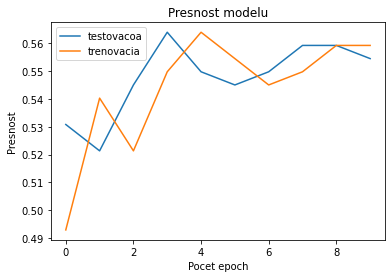

In [14]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Presnost modelu')
plt.ylabel('Presnost')
plt.xlabel('Pocet epoch')
plt.legend(['testovacoa', 'trenovacia'])
plt.show()

In [10]:
print((scores[1]*100))

55.450236797332764


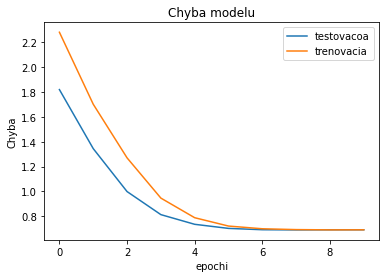

In [15]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Chyba modelu')
plt.ylabel('Chyba')
plt.xlabel('epochi')
plt.legend(['testovacoa', 'trenovacia'])
plt.show()